In [1]:
# importar librearías:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

In [2]:
# cargar data:
datos = pd.read_csv("Evaluaciones_escalas_final.csv")

In [3]:
# transformamos a variables dummies:
data_dum = pd.get_dummies(datos, columns=["COD_DEPE", "RURAL_RBD", "DOC_GENERO"])

In [4]:
# eliminamos variables que entregan información innecesaria:
datos2 = data_dum.drop(["RURAL_RBD_Urbano", "DOC_GENERO_Mujer"], axis=1)

In [5]:
X = datos2.drop("INSTR_ESC", axis=1)
y= datos2["INSTR_ESC"]

In [6]:
# Creamos el modelo de árbol de clasificación:
modelo = DecisionTreeClassifier(criterion='entropy').fit(X, y)

[Text(0.5476190476190477, 0.9, 'X[4] <= 0.5\nentropy = 1.286\nsamples = 75348\nvalue = [13363, 50676, 10652, 657]\nclass = Básico'),
 Text(0.30952380952380953, 0.7, 'X[0] <= 0.5\nentropy = 1.252\nsamples = 54291\nvalue = [8707, 37101, 8175, 308]\nclass = Básico'),
 Text(0.19047619047619047, 0.5, 'X[3] <= 0.5\nentropy = 1.238\nsamples = 17303\nvalue = [3082, 11889, 2236, 96]\nclass = Básico'),
 Text(0.09523809523809523, 0.3, 'X[2] <= 0.5\nentropy = 1.24\nsamples = 15038\nvalue = [2674, 10324, 1955, 85]\nclass = Básico'),
 Text(0.047619047619047616, 0.1, 'entropy = 1.243\nsamples = 12739\nvalue = [2286, 8724, 1659, 70]\nclass = Básico'),
 Text(0.14285714285714285, 0.1, 'entropy = 1.225\nsamples = 2299\nvalue = [388, 1600, 296, 15]\nclass = Básico'),
 Text(0.2857142857142857, 0.3, 'X[2] <= 0.5\nentropy = 1.225\nsamples = 2265\nvalue = [408, 1565, 281, 11]\nclass = Básico'),
 Text(0.23809523809523808, 0.1, 'entropy = 1.205\nsamples = 1833\nvalue = [312, 1287, 224, 10]\nclass = Básico'),
 T

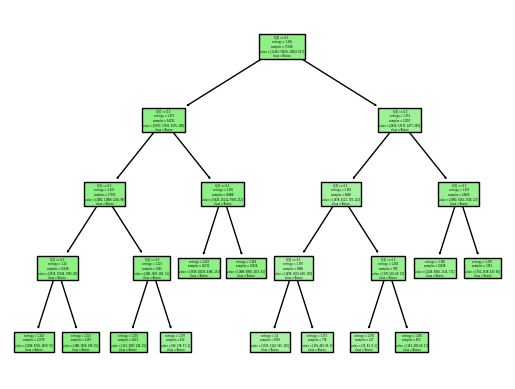

In [7]:
# Graficamos:
plot_tree(modelo, filled=True, class_names=['Competente', 'Básico', 'Destacado', 'Insatisfactorio'])

In [8]:
# Determinamos la importancia de las variables:
importancia = modelo.feature_importances_

In [9]:
# Obtenemos los índices de las características ordenados por importancia:
indices = np.argsort(importancia)[::-1]
print(indices)

[4 0 3 2 1]


In [10]:
# Obtenemos la proporción de impureza reducida por cada variable:
for i, importancia in enumerate(importancia):
    print("Variable", i, "importancia:", importancia)

Variable 0 importancia: 0.21118938772303175
Variable 1 importancia: 0.0024713713498131134
Variable 2 importancia: 0.015276975891713371
Variable 3 importancia: 0.04500866755283601
Variable 4 importancia: 0.7260535974826057


In [11]:
# Obtenemos los índices de las características ordenadas por importancia (Feature 0 es la más importante):
feature_names = X.columns
for i, idx in enumerate(indices):
    print(f"Feature {i}: {feature_names[idx]} (index {idx})")

Feature 0: DOC_GENERO_Hombre (index 4)
Feature 1: COD_DEPE_Municipal (index 0)
Feature 2: RURAL_RBD_Rural (index 3)
Feature 3: COD_DEPE_Serv. Local Educación (index 2)
Feature 4: COD_DEPE_Municipal DAEM (index 1)


In [12]:
#Exportamos a CSV:
datos2.to_csv("Eval_doc_dummines.csv", index=False)